In [1]:
from py_nn import Matrix, NeuralNetwork, MseOptimizer

import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.linspace(0, 1, 100).reshape(-1, 1)

Y = X + 0.1 * np.random.randn(*X.shape)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


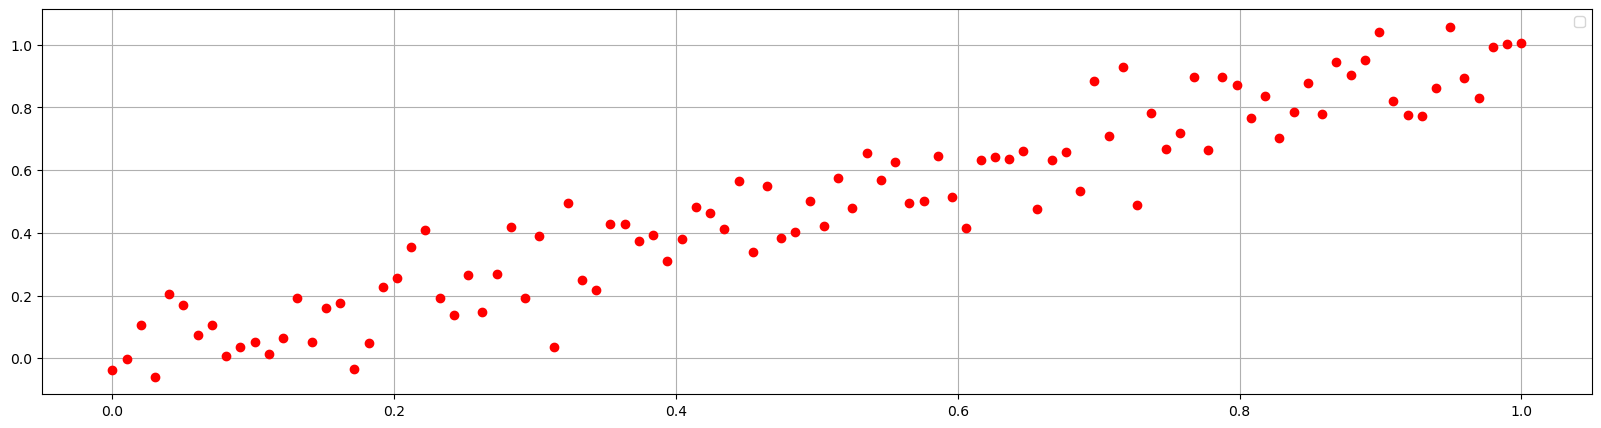

In [8]:
plt.figure(figsize=(20, 5))
plt.plot(X, Y, 'ro')
plt.grid(True)
plt.legend()

In [4]:
X_matrix = Matrix.from_2d_vector(X.tolist())
Y_matrix = Matrix.from_2d_vector(Y.tolist())

In [5]:
optimizer = MseOptimizer(0.001)

nn = NeuralNetwork()
nn.add_fully_connected_layer((1, 1))

In [6]:
def get_y_pred(nn: NeuralNetwork, X_matrix: Matrix):
    Y_pred = []

    for i in range(X_matrix.get_shape()[0]):
        Y_pred.append(nn.forward(X_matrix.get_row(i)).get_value((0, 0)))

    return Y_pred

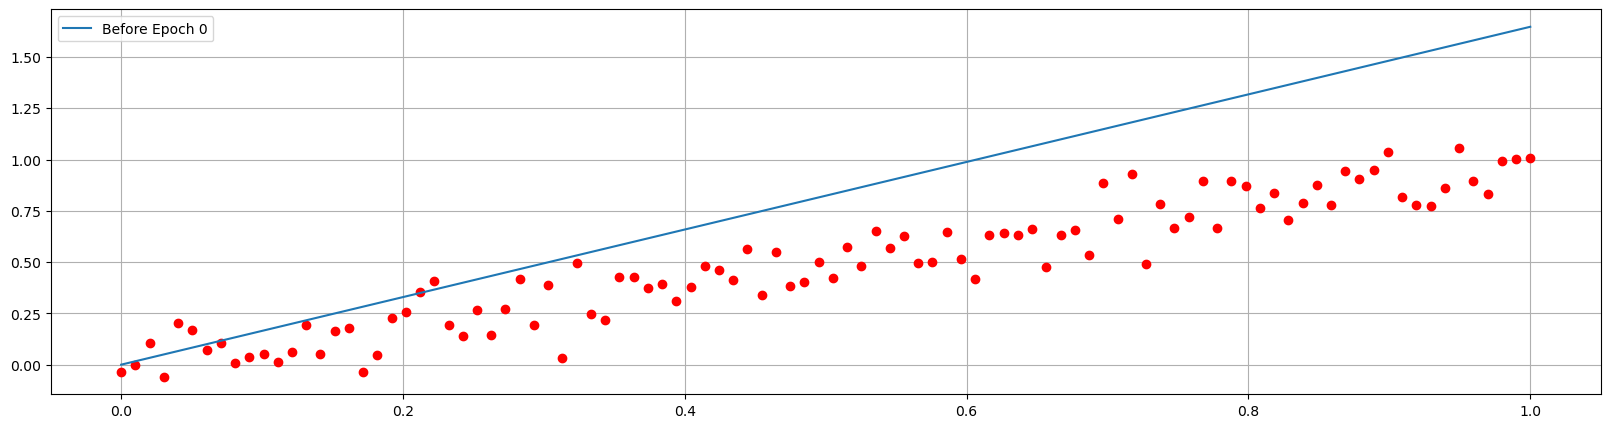

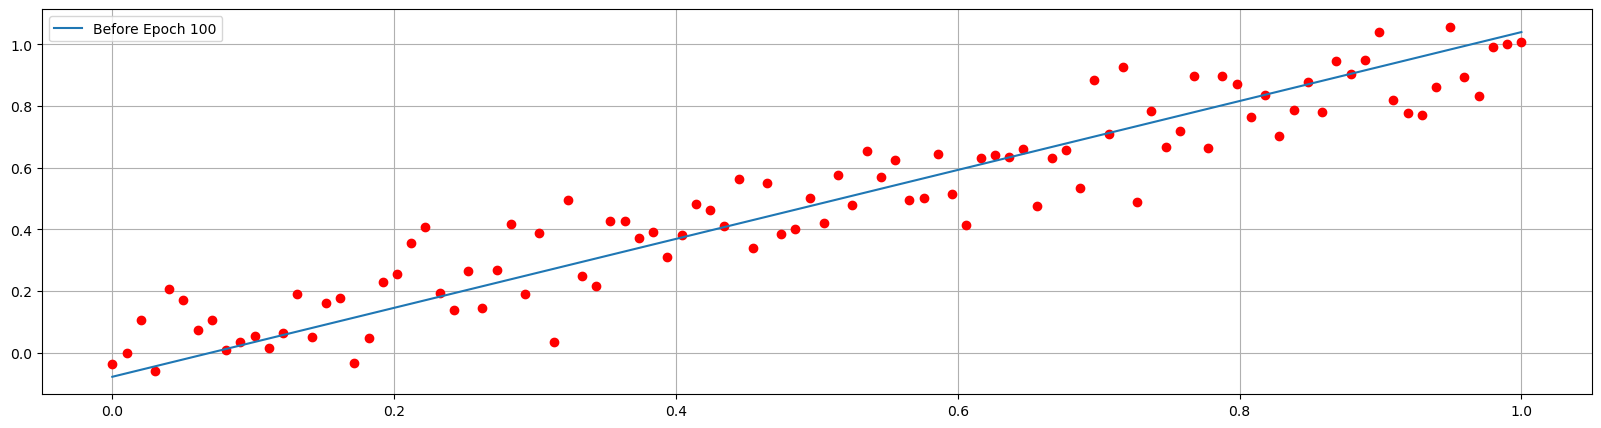

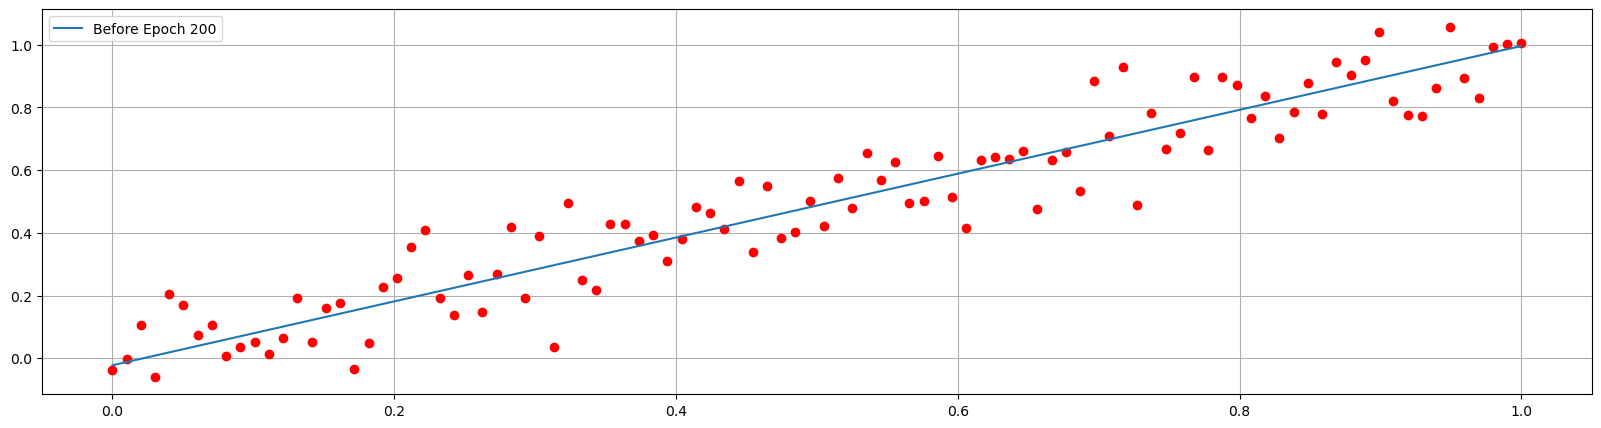

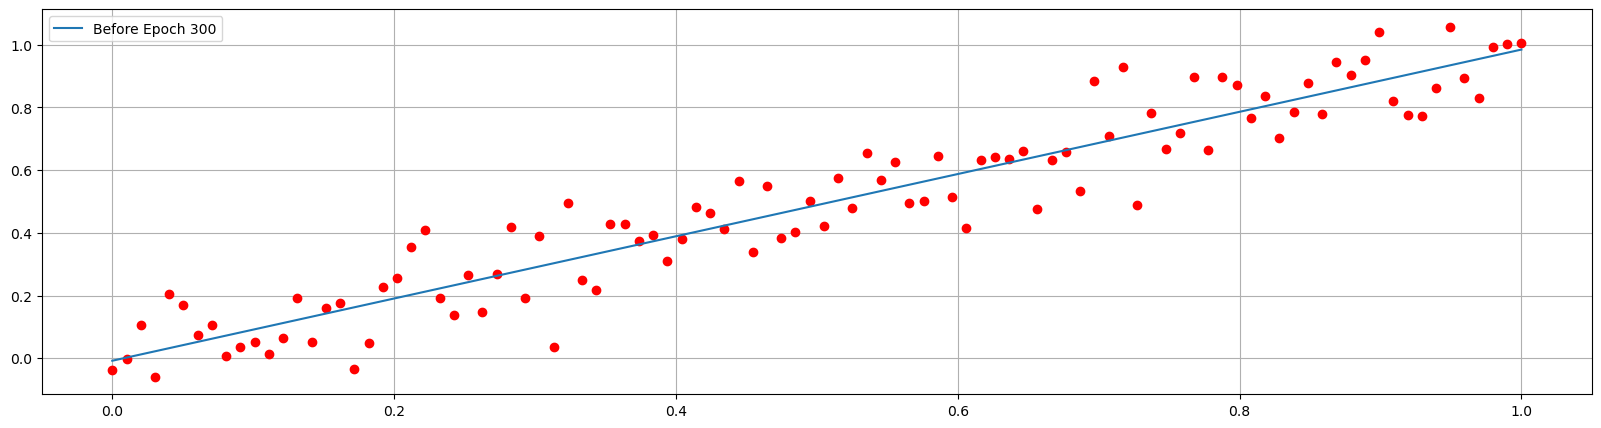

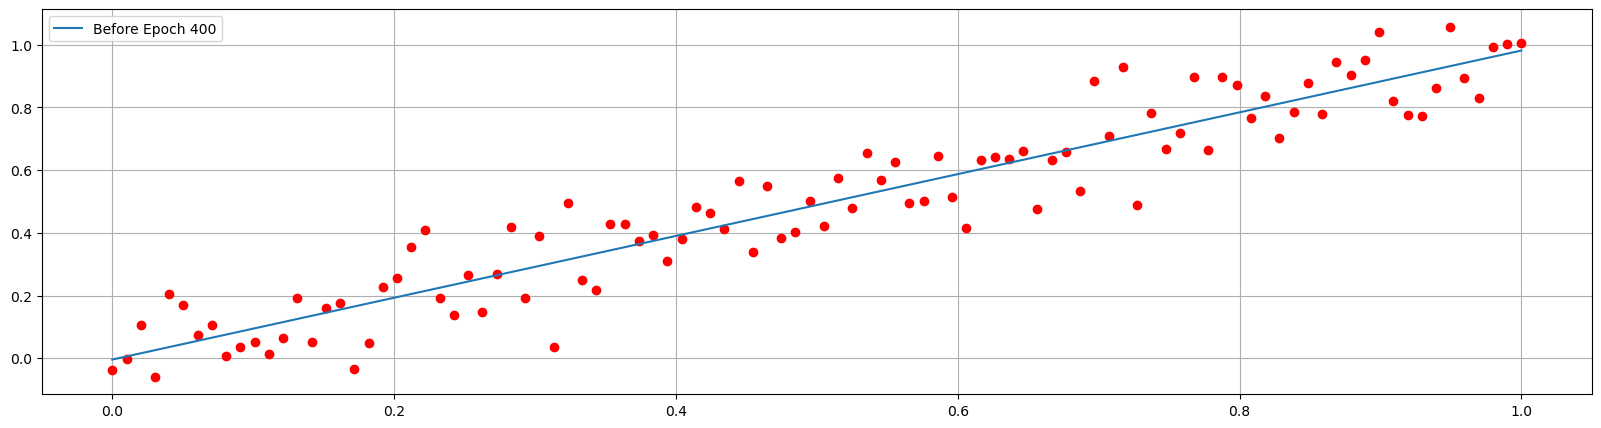

In [7]:
for i in range(500):
    if i % 100 == 0:
        plt.figure(figsize=(20, 5))
        plt.plot(X, Y, 'ro')
        plt.plot(X, get_y_pred(nn, X_matrix), label=f'Before Epoch {i}')
        plt.grid(True)
        plt.legend()

    optimizer.train_on_sample(nn, X_matrix, Y_matrix)